# Optimizing k-Means Clustering - Code Notebook Exercise
**Author**: Dr. Yves Staudt

CAS: Machine Learning - Unsupervised Learning

## Loading Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

## Loading Data

In [2]:
# attention to adapt path
df = pd.read_csv('lego_dataset_encoded_prepared_selected_feature.csv')

## Scaling Data

In [3]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df)

# transform train and test sets
df_scaled = scaler.transform(df)

In [4]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Optimizing K-Means

In [5]:
# Initialize an empty list to store dictionaries
results_list = []

for k in range(2, 11):
    km = KMeans(
        n_clusters=k,
        init='k-means++', # selection of initial cluster centroids, mostly random use
        n_init=10, # number of times k-means algorithm is run with different centroid seeds
        max_iter=300, # maximum number of iterations
        tol=1e-04,  # relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to dcelare convergence
        random_state=0 # determines random number generation fo centroid initialization, important for refeasibility
    )    
    km.fit(df_scaled)

    orig_disp = km.inertia_

    # Append to the list
    results_list.append({
        'clusterCount': k,
        'distortions': orig_disp,
        'silhouetteScore': silhouette_score(df_scaled, km.labels_, metric='euclidean')
    })

# Create a DataFrame from the list
resultsdf = pd.DataFrame(results_list)

## Representing Results from Optimization

In [6]:
resultsdf

,clusterCount,distortions,silhouetteScore
0,2,1499.496135,0.206147
1,3,1313.108243,0.246039
2,4,1182.359797,0.267014
3,5,1083.674343,0.225806
4,6,1038.567562,0.245518
5,7,1006.898903,0.257604
6,8,964.845780,0.268649
7,9,935.025799,0.264330
8,10,914.809341,0.251143


/Users/ystaudt/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ystaudt/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ystaudt/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ystaudt/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

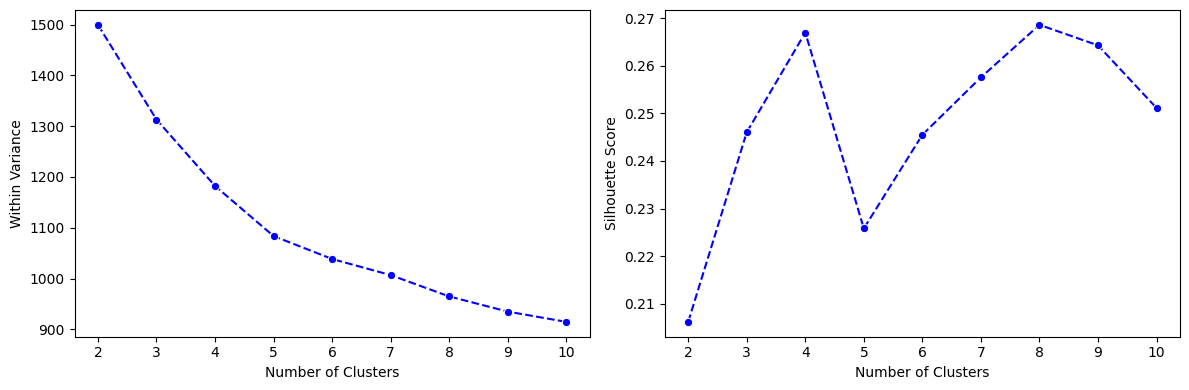

In [7]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.lineplot(x = 'clusterCount', y = 'distortions', data=resultsdf, ax = axs[0], linestyle = '--', marker = 'o', color='b')
sns.lineplot(x='clusterCount', y='silhouetteScore', data=resultsdf, ax = axs[1], linestyle='--', marker='o', color='b')

axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Within Variance')

axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')


# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

## k-Means Clustering for Optimal k

In [8]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
km.fit(df_scaled)

KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

## Cluster Centers

In [9]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=df_scaled.columns)
cluster_centers

,Empfohlenes Alter in Jahren (mind.),Empfohlenes Alter in Jahren (max.),Verpackungsbreite,Verpackungstiefe,Verpackungshöhe,Paketgewicht,kein_nachhaltigkeitszertifikat,Produktfarbe_Rare,Ursprungsland_ Ungarn,Ursprungsland_ China,...,LegoCategory_LEGO Architecture,LegoCategory_LEGO Classic,LegoCategory_LEGO Ideas,LegoCategory_LEGO Super Mario,LegoCategory_LEGO Friends,LegoCategory_LEGO Creator 3in1,LegoCategory_LEGO Minecraft,LegoCategory_LEGO Spider,LegoCategory_LEGO Jurassic World,LegoCategory_LEGO Dots
0,0.350687,0.968448,0.450695,0.467618,0.183426,0.086588,0.477273,6.818182e-02,-5.551115e-17,1.387779e-16,...,5.681818e-02,1.022727e-01,3.409091e-02,0.068182,0.045455,1.022727e-01,-1.040834e-17,-3.469447e-18,0.000000,0.022727
1,0.314499,0.985553,0.437644,0.449296,0.155700,0.062332,0.886420,7.407407e-03,4.718448e-16,-4.163336e-16,...,-5.204170e-18,-3.816392e-17,1.975309e-02,0.079012,0.009877,2.716049e-02,5.185185e-02,1.234568e-02,0.002469,0.032099
2,0.351058,1.000000,0.483364,0.548925,0.171586,0.093004,0.824121,6.938894e-18,9.045226e-01,1.942890e-16,...,2.010050e-02,5.527638e-02,3.469447e-18,0.010050,0.211055,3.469447e-18,1.005025e-02,1.005025e-02,0.005025,0.070352
3,0.215292,1.000000,0.378691,0.432321,0.148085,0.049638,0.853535,8.673617e-18,1.665335e-16,1.000000e+00,...,8.673617e-18,-3.122502e-17,1.515152e-02,0.035354,0.156566,5.050505e-03,5.050505e-03,1.515152e-02,0.055556,0.010101


## Interpreting Results

In [10]:
df_pred = df
df_pred['cluster_predict'] = km.labels_

In [11]:
df_pred[['cluster_predict']].groupby('cluster_predict').value_counts()

cluster_predict
0     88
1    405
2    199
3    198
Name: count, dtype: int64

In [12]:
df_pred.groupby('cluster_predict').describe()

Empfohlenes Alter in Jahren (mind.)                           \
                                              count      mean       std  min   
cluster_predict                                                                
0                                              88.0  9.039773  4.872054  1.5   
1                                             405.0  8.261728  3.745544  1.5   
2                                             199.0  9.047739  5.480358  1.5   
3                                             198.0  6.128788  3.208860  1.5   

                                      Empfohlenes Alter in Jahren (max.)  \
                 25%  50%   75%   max                              count   
cluster_predict                                                            
0                6.0  7.0  12.0  23.0                               88.0   
1                7.0  7.0   8.0  18.0                              405.0   
2                6.0  7.0  13.0  18.0                              199.0   
3                4.0  6.0   7.0  18.0                              198.0   

                            ... LegoCategory_LEGO Jurassic World        \
                      mean  ...                               75%  max   
cluster_predict             ...                                          
0                96.034091  ...                               0.0  0.0   
1                97.641975  ...                               0.0  1.0   
2                99.000000  ...                               0.0  1.0   
3                99.000000  ...                               0.0  1.0   

                LegoCategory_LEGO Dots                                      \
                                  count      mean       std  min  25%  50%   
cluster_predict                                                              
0                                  88.0  0.022727  0.149887  0.0  0.0  0.0   
1                                 405.0  0.032099  0.176480  0.0  0.0  0.0   
2                                 199.0  0.070352  0.256384  0.0  0.0  0.0   
3                                 198.0  0.010101  0.100248  0.0  0.0  0.0   

                           
                 75%  max  
cluster_predict            
0                0.0  1.0  
1                0.0  1.0  
2                0.0  1.0  
3                0.0  1.0  

[4 rows x 312 columns]

## Figures

In [13]:
def my_boxplot_fct(data,variable):
    fig = px.box(data, x="cluster_predict", y=variable)
    fig.show()


In [14]:
df_pred.columns

Index(['Empfohlenes Alter in Jahren (mind.)',
       'Empfohlenes Alter in Jahren (max.)', 'Verpackungsbreite',
       'Verpackungstiefe', 'Verpackungshöhe', 'Paketgewicht',
       'kein_nachhaltigkeitszertifikat', 'Produktfarbe_Rare',
       'Ursprungsland_ Ungarn ', 'Ursprungsland_ China ',
       'Ursprungsland_ Tschechische Republik ', 'Ursprungsland_Rare',
       'Ursprungsland_ Dänemark ',
       'EU TSD Warnung_ Keine Warnung zutreffend, Nicht für Kinder unter 36 Monaten geeignet ',
       'EU TSD Warnung_ Nicht für Kinder unter 36 Monaten geeignet ',
       'EU TSD Warnung_ Nicht für Kinder unter 18 Monaten geeignet ',
       'Verpackungsart_ Box ', 'Verpackungsart_ Polybag ', 'LegoCategory_Rare',
       'LegoCategory_LEGO Disney ', 'LegoCategory_LEGO Technic ',
       'LegoCategory_LEGO City ', 'LegoCategory_LEGO Duplo ',
       'LegoCategory_LEGO Star Wars ', 'LegoCategory_LEGO Ninjago ',
       'LegoCategory_LEGO Icons ', 'LegoCategory_LEGO Marvel ',
       'LegoCategory_LEG

In [15]:
my_boxplot_fct(df_pred, "Empfohlenes Alter in Jahren (mind.)")

In [16]:
my_boxplot_fct(df_pred, "Verpackungstiefe")